In [37]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from keras_tuner import RandomSearch

# 1. Data Exploration and Preprocessing
### ●	Begin by loading and exploring the "Alphabets_data.csv" dataset. Summarize its key features such as the number of samples, features, and classes.
### ●	Execute necessary data preprocessing steps including data normalization, managing missing values.

In [38]:
df = pd.read_csv(r"C:\Users\chand\OneDrive\Desktop\Neural networks\Neural networks\Alphabets_data.csv")

In [39]:
df.head(10)

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10
5,S,4,11,5,8,3,8,8,6,9,5,6,6,0,8,9,7
6,B,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10
7,A,1,1,3,2,1,8,2,2,2,8,2,8,1,6,2,7
8,J,2,2,4,4,2,10,6,2,6,12,4,8,1,6,1,7
9,M,11,15,13,9,7,13,2,6,2,12,1,9,8,1,1,8


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [41]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [42]:
df.isnull().sum()

letter    0
xbox      0
ybox      0
width     0
height    0
onpix     0
xbar      0
ybar      0
x2bar     0
y2bar     0
xybar     0
x2ybar    0
xy2bar    0
xedge     0
xedgey    0
yedge     0
yedgex    0
dtype: int64

In [43]:
# Number of samples
num_samples = df.shape[0]

print(f'Number of samples: {num_samples}')

Number of samples: 20000


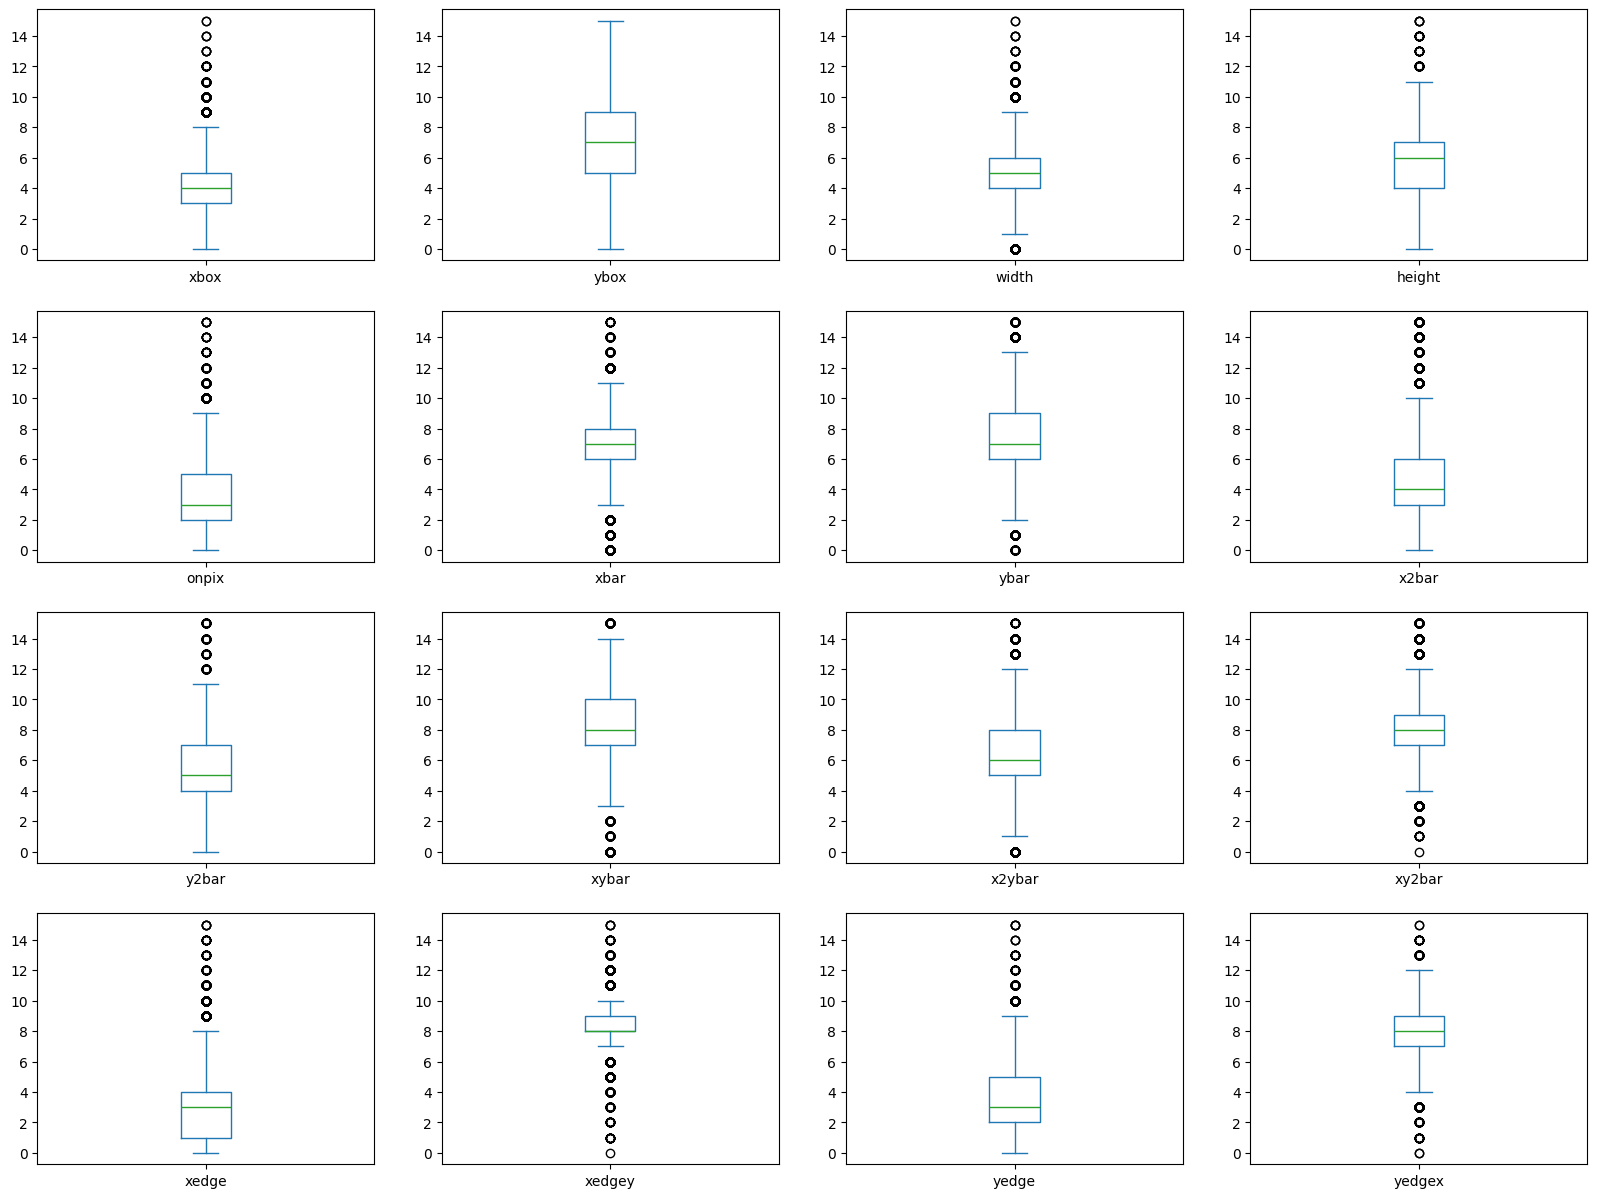

In [44]:
# Box plots
box = df.plot(kind='box', subplots=True, layout=(4,4), figsize=(20,15))

# 2. Model Implementation
### ●	Construct a basic ANN model using your chosen high-level neural network library. Ensure your model includes at least one hidden layer.
### ●	Divide the dataset into training and test sets.
### ●	Train your model on the training set and then use it to make predictions on the test set.


In [45]:
# Separate features and target
X = df.drop(columns='letter')
y = df['letter']

# Normalize features using MinMaxScaler
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Encode target labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_encoded, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16000, 16), (4000, 16), (16000,), (4000,))

In [46]:
tf.random.set_seed(42)

# Define the basic ANN model structure
model = Sequential([
    Dense(32, activation='relu', input_shape=(16,)),
    Dense(16, activation='relu'),                     
    Dense(len(label_encoder.classes_), activation='softmax')  
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
test_loss, test_accuracy

Epoch 1/10
400/400 [==============================] - 3s 5ms/step - loss: 2.9941 - accuracy: 0.1657 - val_loss: 2.5254 - val_accuracy: 0.2856
Epoch 2/10
400/400 [==============================] - 2s 5ms/step - loss: 2.2198 - accuracy: 0.3580 - val_loss: 2.0360 - val_accuracy: 0.4328
Epoch 3/10
400/400 [==============================] - 2s 4ms/step - loss: 1.8875 - accuracy: 0.4473 - val_loss: 1.8156 - val_accuracy: 0.4794
Epoch 4/10
400/400 [==============================] - 2s 4ms/step - loss: 1.7028 - accuracy: 0.5072 - val_loss: 1.6491 - val_accuracy: 0.5509
Epoch 5/10
400/400 [==============================] - 2s 4ms/step - loss: 1.5327 - accuracy: 0.5638 - val_loss: 1.5014 - val_accuracy: 0.5788
Epoch 6/10
400/400 [==============================] - 2s 4ms/step - loss: 1.4134 - accuracy: 0.5984 - val_loss: 1.3991 - val_accuracy: 0.6125
Epoch 7/10
400/400 [==============================] - 2s 4ms/step - loss: 1.3314 - accuracy: 0.6205 - val_loss: 1.3283 - val_accuracy: 0.6303
Epoch 

(1.167083978652954, 0.675000011920929)

In [47]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


Test Loss: 1.167083978652954
Test Accuracy: 0.675000011920929


# 3. Hyperparameter Tuning
### ●	Modify various hyperparameters, such as the number of hidden layers, neurons per hidden layer, activation functions, and learning rate, to observe their impact on model performance.
### ●	Adopt a structured approach like grid search or random search for hyperparameter tuning, documenting your methodology thoroughly.


In [48]:
# Encode the target labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

y_train_cat = to_categorical(y_train_encoded)
y_test_cat = to_categorical(y_test_encoded)

In [49]:
# Define the model-building function
def build_model(hp):
    model = Sequential()
    
    # Input Layer with tunable units and activation
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=128, step=32),
                    activation=hp.Choice('activation_input', values=['relu', 'tanh', 'sigmoid']),
                    input_shape=(X_train.shape[1],)))
    
    # Tunable number of hidden layers and units in each layer
    for i in range(hp.Int('num_layers', 1, 3)):  # 1 to 3 hidden layers
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=128, step=32),
                        activation=hp.Choice(f'activation_{i}', values=['relu', 'tanh', 'sigmoid'])))
    
    # Output layer with softmax activation for multi-class classification
    model.add(Dense(y_train_cat.shape[1], activation='softmax'))
    
    # Compile the model with a tunable learning rate
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model


In [50]:
# Set up the Random Search tuner
tuner = RandomSearch(
    build_model,
    objective='val_accuracy', 
    max_trials=5,  
    executions_per_trial=3,  
    directory='tuner_results',
    project_name='alphabet_classification'
)

Reloading Tuner from tuner_results\alphabet_classification\tuner0.json


In [51]:
# Run the hyperparameter search
tuner.search(X_train, y_train_cat, epochs=20, validation_data=(X_test, y_test_cat))

# Get the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]


In [52]:
# Printing the best hyperparameters
print("Best Hyperparameters:")
print(f"Number of Hidden Layers: {best_hyperparameters.get('num_layers')}")
for i in range(best_hyperparameters.get('num_layers')):
    print(f"Layer {i+1} - Units: {best_hyperparameters.get(f'units_{i}')}, Activation: {best_hyperparameters.get(f'activation_{i}')}")
print(f"Learning Rate: {best_hyperparameters.get('learning_rate')}")


Best Hyperparameters:
Number of Hidden Layers: 1
Layer 1 - Units: 128, Activation: relu
Learning Rate: 0.01


# 4. Evaluation
### ●	Employ suitable metrics such as accuracy, precision, recall, and F1-score to evaluate your model's performance.
### ●	Discuss the performance differences between the model with default hyperparameters and the tuned model, emphasizing the effects of hyperparameter tuning.


In [53]:
# Evaluate the default model
default_y_pred = np.argmax(model.predict(X_test), axis=1)
default_accuracy = accuracy_score(y_test, default_y_pred)
default_precision = precision_score(y_test, default_y_pred, average='weighted')
default_recall = recall_score(y_test, default_y_pred, average='weighted')
default_f1 = f1_score(y_test, default_y_pred, average='weighted')

# Print default model performance
print("Default Model Performance:")
print(f"Accuracy  : {default_accuracy:.2f}")
print(f"Precision : {default_precision:.2f}")
print(f"Recall    : {default_recall:.2f}")
print(f"F1-Score  : {default_f1:.2f}")
print("\nClassification Report for Default Model:")
print(classification_report(y_test, default_y_pred))

125/125 [==============================] - 0s 3ms/step
Default Model Performance:
Accuracy  : 0.68
Precision : 0.68
Recall    : 0.68
F1-Score  : 0.67

Classification Report for Default Model:
              precision    recall  f1-score   support

           0       0.92      0.87      0.89       149
           1       0.59      0.73      0.65       153
           2       0.72      0.67      0.69       137
           3       0.73      0.63      0.68       156
           4       0.58      0.55      0.56       141
           5       0.53      0.64      0.58       140
           6       0.61      0.58      0.59       160
           7       0.43      0.35      0.39       144
           8       0.84      0.73      0.78       146
           9       0.64      0.76      0.70       149
          10       0.52      0.53      0.53       130
          11       0.89      0.78      0.83       155
          12       0.84      0.85      0.84       168
          13       0.77      0.73      0.75       1

In [54]:
# Evaluate the tuned model
tuned_y_pred = np.argmax(best_model.predict(X_test), axis=1)
tuned_accuracy = accuracy_score(y_test, tuned_y_pred)
tuned_precision = precision_score(y_test, tuned_y_pred, average='weighted')
tuned_recall = recall_score(y_test, tuned_y_pred, average='weighted')
tuned_f1 = f1_score(y_test, tuned_y_pred, average='weighted')

# Print tuned model performance
print("\nTuned Model Performance:")
print(f"Accuracy  : {tuned_accuracy:.2f}")
print(f"Precision : {tuned_precision:.2f}")
print(f"Recall    : {tuned_recall:.2f}")
print(f"F1-Score  : {tuned_f1:.2f}")
print("\nClassification Report for Tuned Model:")
print(classification_report(y_test, tuned_y_pred))

125/125 [==============================] - 1s 3ms/step

Tuned Model Performance:
Accuracy  : 0.93
Precision : 0.94
Recall    : 0.93
F1-Score  : 0.93

Classification Report for Tuned Model:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       149
           1       0.96      0.86      0.91       153
           2       0.95      0.85      0.90       137
           3       0.96      0.90      0.93       156
           4       0.85      0.96      0.90       141
           5       0.91      0.91      0.91       140
           6       0.89      0.94      0.91       160
           7       0.84      0.83      0.84       144
           8       0.99      0.90      0.94       146
           9       0.94      0.95      0.95       149
          10       0.89      0.91      0.90       130
          11       0.99      0.94      0.96       155
          12       0.98      0.96      0.97       168
          13       0.98      0.95      0.97       151


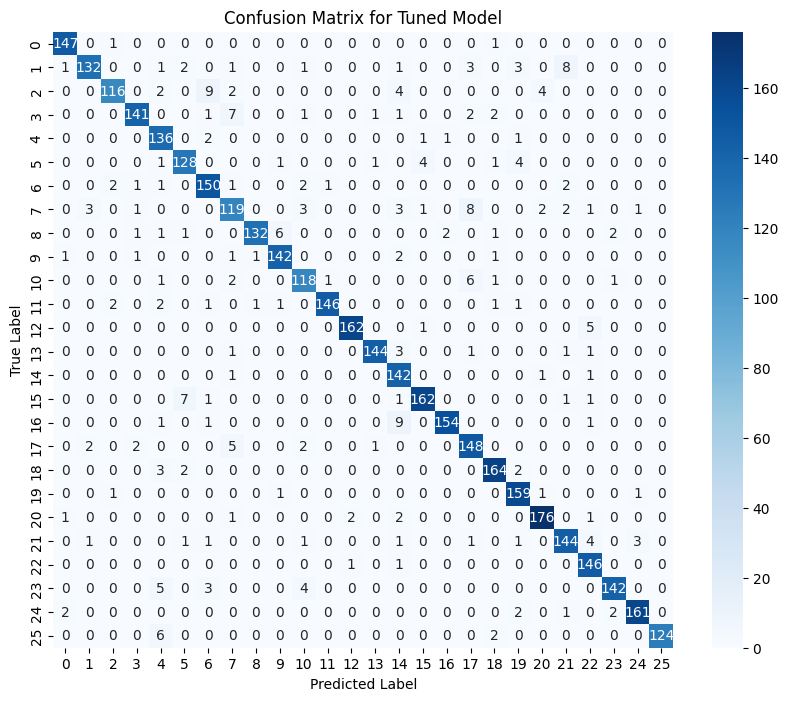

In [55]:
# Plot confusion matrix for better visual understanding

conf_matrix = confusion_matrix(y_test, tuned_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for Tuned Model")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [56]:
"""Discussing Performance Differences:

Improved Performance:
When compared the both we can say that tunned model has improved and better performance.

Model Complexity:
Hyperparameter tuning balances underfitting and overfitting.

Efficiency:
Though initially computationally intensive, tuning optimizes model performance long-term."""

'Discussing Performance Differences:\n\nImproved Performance:\nWhen compared the both we can say that tunned model has improved and better performance.\n\nModel Complexity:\nHyperparameter tuning balances underfitting and overfitting.\n\nEfficiency:\nThough initially computationally intensive, tuning optimizes model performance long-term.'